We are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels. The higher the risk, the higher the value of 'Response'.

In [80]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [81]:
train = pd.read_csv('train.csv')

In [82]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [97]:
train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [101]:
train.columns.values

array(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4',
       'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1',
       'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5',
       'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1',
       'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8',
       'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2',
       'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', 'Medical

In [83]:
train.Response.head()

0    8
1    4
2    8
3    8
4    8
Name: Response, dtype: int64

In [84]:
train.Ins_Age.head() #Normalized age of applicant

0    0.641791
1    0.059701
2    0.029851
3    0.164179
4    0.417910
Name: Ins_Age, dtype: float64

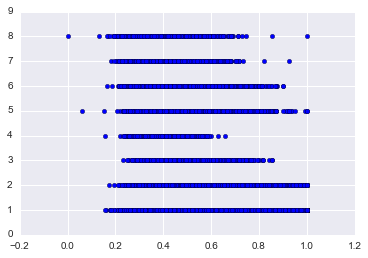

In [85]:
plt.scatter(train.BMI,train.Response)

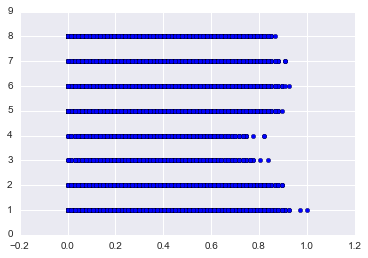

In [86]:
plt.scatter(train.Ins_Age,train.Response)

In [87]:
for i in range(1,9):
    print(i,':',train[train.Response==i].BMI.mean())

1 : 0.5093064036510383
2 : 0.5469086081684978
3 : 0.5158841480503453
4 : 0.4177733663368353
5 : 0.5707632891802269
6 : 0.4906318046252115
7 : 0.46467915037859564
8 : 0.393643561828768


In [88]:
len(train[train.Response==2])

6552

In [89]:
def plot_mean(df, var):
    x= []
    y= []
    for i in range(1,9):
        print(i,':',df[df.Response==i][var].mean())
        x.append(i)
        y.append(df[df.Response==i][var].mean())
    
    plt.scatter(x, y)

1 : 0.49290762235282815
2 : 0.4609917445755508
3 : 0.35947606488548867
4 : 0.3370333207766112
5 : 0.40459521244514113
6 : 0.42626536151945194
7 : 0.43445907376130694
8 : 0.34297418443722055


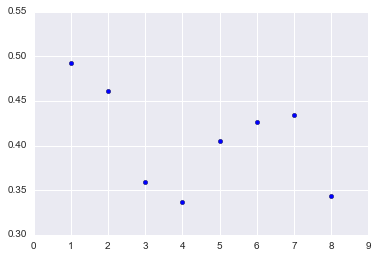

In [90]:
plot_mean(train, 'Ins_Age')

In [103]:
train.shape[0] == len(train)

True

In [109]:
train.ndim, train.shape, train.shape[0]* train.shape[1], train.size

(2, (59381, 128), 7600768, 7600768)

In [92]:
print("%20s \tCount \tPct missing" % 'Feature')
for column_name, column in train.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       print("%20s \t%5d  \t%2.2f%%" % (column_name, naCount, 100.*naCount/train.shape[0]))

             Feature 	Count 	Pct missing
   Employment_Info_1 	   19  	0.03%
   Employment_Info_4 	 6779  	11.42%
   Employment_Info_6 	10854  	18.28%
 Insurance_History_5 	25396  	42.77%
       Family_Hist_2 	28656  	48.26%
       Family_Hist_3 	34241  	57.66%
       Family_Hist_4 	19184  	32.31%
       Family_Hist_5 	41811  	70.41%
   Medical_History_1 	 8889  	14.97%
  Medical_History_10 	58824  	99.06%
  Medical_History_15 	44596  	75.10%
  Medical_History_24 	55580  	93.60%
  Medical_History_32 	58274  	98.14%


In [93]:
print(sum(train.Employment_Info_1.isnull()))

19


In [94]:
train.Employment_Info_4.isnull().astype(int).mean()

0.11416109529984339

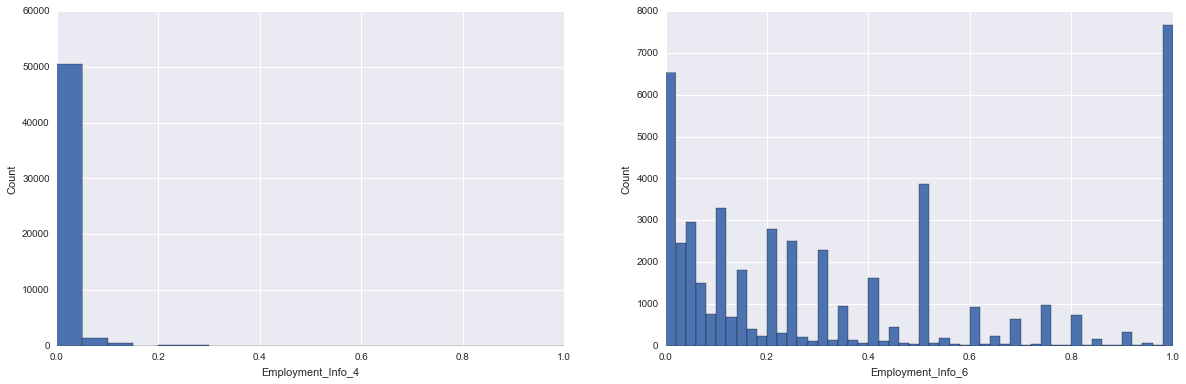

In [95]:
# Plot distributions for Employment_Info_4 and Employment_Info_6
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,6))
train["Employment_Info_4"].plot(kind='hist',bins=20,xlim=(0,1),ax=axis1)
axis1.set_xlabel("Employment_Info_4")
axis1.set_ylabel("Count")
train["Employment_Info_6"].plot(kind='hist',bins=50,xlim=(0,1),ax=axis2)
axis2.set_xlabel("Employment_Info_6")
axis2.set_ylabel("Count")

In [96]:
train["Insurance_History_5"]

0        0.000667
1        0.000133
2             NaN
3             NaN
4             NaN
5        0.005000
6        0.001667
7        0.000667
8        0.007613
9        0.000667
10       0.000587
11            NaN
12       0.000667
13            NaN
14       0.004000
15       0.000480
16            NaN
17            NaN
18       0.000400
19            NaN
20       0.001107
21            NaN
22            NaN
23       0.003333
24       0.000133
25            NaN
26       0.002333
27       0.000667
28       0.001000
29       0.004720
           ...   
59351         NaN
59352         NaN
59353         NaN
59354    0.006667
59355    0.000333
59356    0.000067
59357         NaN
59358         NaN
59359    0.002067
59360         NaN
59361         NaN
59362    0.000667
59363         NaN
59364         NaN
59365         NaN
59366    0.002000
59367    0.005667
59368    0.000733
59369         NaN
59370    0.001333
59371         NaN
59372         NaN
59373         NaN
59374         NaN
59375     

In [104]:
train["Medical_History_32"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
59351    NaN
59352    0.0
59353    NaN
59354    NaN
59355    NaN
59356    NaN
59357    NaN
59358    NaN
59359    NaN
59360    NaN
59361    NaN
59362    NaN
59363    NaN
59364    NaN
59365    NaN
59366    NaN
59367    NaN
59368    NaN
59369    NaN
59370    NaN
59371    NaN
59372    NaN
59373    NaN
59374    NaN
59375    NaN
59376    NaN
59377    NaN
59378    NaN
59379    NaN
59380    NaN
Name: Medical_History_32, dtype: float64